## Series representations of functions
In this notebook, we look at series representations of functions and visualize functions we want to represent and the partial sums of their series representations.

In [1]:
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy import integrate

### Computing series representations
First, we calculate the coefficients of the infinite sum representation $\sum_{n=1}^\infty a_n v_n(x)$ of a given function $f(x)$ defined on the interval $[0,\pi]$ numerically.

In [2]:
# defines the function f(x)
def f(x):
    return x*(np.pi-x)

# defines the basis functions we use to represent f(x)
def vn(x, n):
    if n==0:
        # v0(x)=e^x
        v = np.exp(x)
    else:
        # vn(x) = cos(nx)+sin(nx)/n
        v = np.sin(n*x)/n+np.cos(n*x)
    return v

# computes the partial sum of the first N+1 terms
def computeSeries(x, N):
    def computeCoeff(n):
        C1,D = integrate.quad(lambda x: f(x)*vn(x,n), 0, np.pi)
        C2,D = integrate.quad(lambda x: vn(x,n)**2, 0, np.pi)
        return C1/C2
    fs = np.array([computeCoeff(n)*vn(x, n) for n in range(0,N+1)])
    fs = fs.sum(axis=0)
    return fs.real

### Plotting functions and their series
Next, we compute and plot the partial sums of a given function

<IPython.core.display.Javascript object>


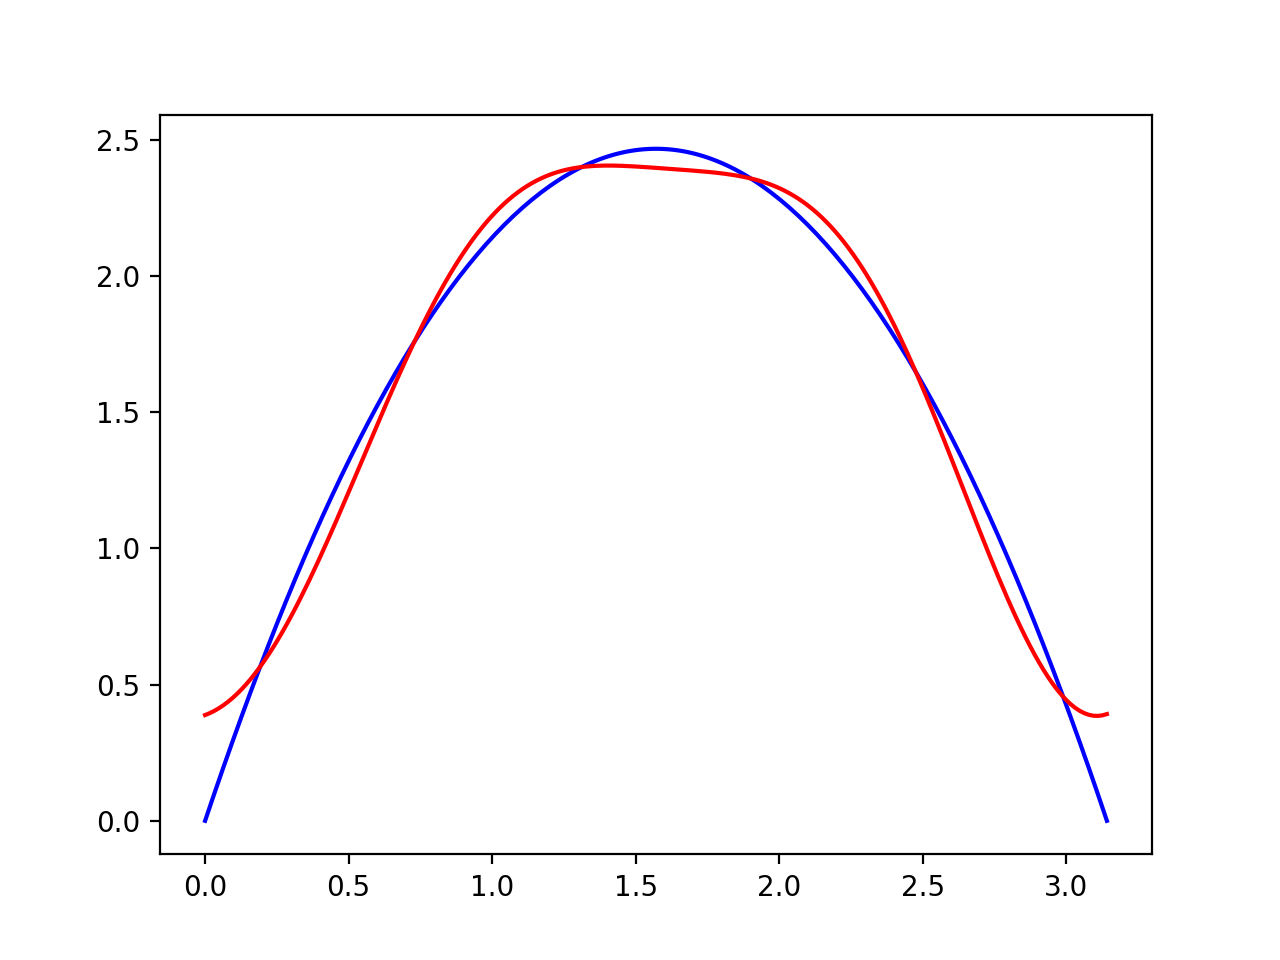

In [3]:
# choose number N of elements in partial sum 
N = 5

# evaluate function and partial sum
x = np.linspace(0,np.pi,200)
Fe = f(x)
Fs = computeSeries(x, N)

# plot function and partial sum
fig = plt.figure()
plt.plot(x, Fe, color="blue")
plt.plot(x, Fs, color="red")
plt.show()

### Animating partial sums
We now use an animation to see how the partial sums behave as $N$ increases.

<IPython.core.display.Javascript object>


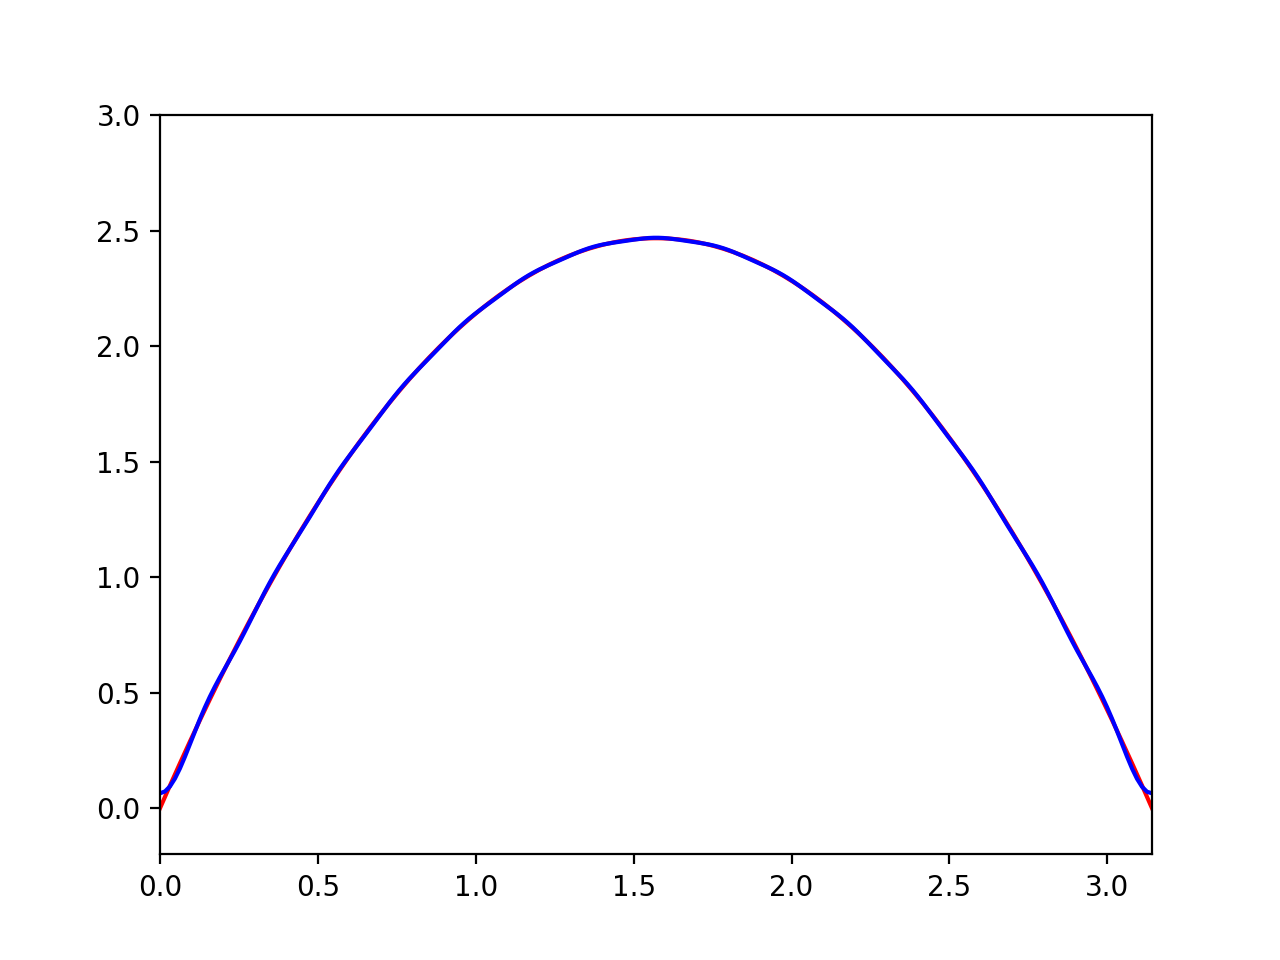

In [4]:
Nmax = 30

output = []
for n in range(1, Nmax+1):
    output.append(computeSeries(x, n))

fig = plt.figure()
ax  = plt.axes(xlim=(0,np.pi), ylim=(-0.2,3.0))
line1, = ax.plot([], [], color = "red")
line2, = ax.plot([], [], color = "blue")

def update(t, line1, line2):
    line1.set_data(x, Fe)
    line2.set_data(x, output[t])
    return [line1,line2]

ani = animation.FuncAnimation(fig, update, frames=range(1, Nmax+1),
                              fargs=[line1, line2], interval=200, blit=True, repeat=False)
plt.show()